In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./crypto_data.csv")

In [3]:
df.sample(5)

,Unnamed: 0,Date,Adj Close_BTC-USD,Adj Close_ETH-USD,Adj Close_SOL-USD,Volume_BTC-USD,Volume_ETH-USD,Volume_SOL-USD
364,364,2021-12-31 00:00:00+00:00,46306.445312,3682.632812,170.299072,36974172400,14157285268,1567918820
1306,1306,2024-07-30 00:00:00+00:00,66201.015625,3278.667725,179.107193,31380492109,14045773047,2766172800
894,894,2023-06-14 00:00:00+00:00,25124.675781,1650.519287,14.486572,14265717766,7462905534,296502336
1025,1025,2023-10-23 00:00:00+00:00,33086.234375,1765.382690,31.850985,38363572311,14362295879,1581590969
277,277,2021-10-05 00:00:00+00:00,51514.812500,3518.518555,164.115829,35873904236,16632591670,2541087419


In [4]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [5]:
df.sample(5)

,Date,Adj Close_BTC-USD,Adj Close_ETH-USD,Adj Close_SOL-USD,Volume_BTC-USD,Volume_ETH-USD,Volume_SOL-USD
1036,2023-11-03 00:00:00+00:00,34732.324219,1832.795166,39.519760,17158456701,7622864055,1755955299
1067,2023-12-04 00:00:00+00:00,41980.097656,2243.215820,61.526615,39856129827,16149367134,2211865569
1217,2024-05-02 00:00:00+00:00,59123.433594,2988.168457,137.814484,32711813559,13163903903,3380078368
526,2022-06-11 00:00:00+00:00,28360.810547,1529.663452,33.821117,27246574439,21127089064,1086904917
1388,2024-10-20 00:00:00+00:00,69001.703125,2746.364014,166.939819,18975847518,14559296242,2579198899


In [8]:
tickers = ['BTC-USD','ETH-USD','SOL-USD']

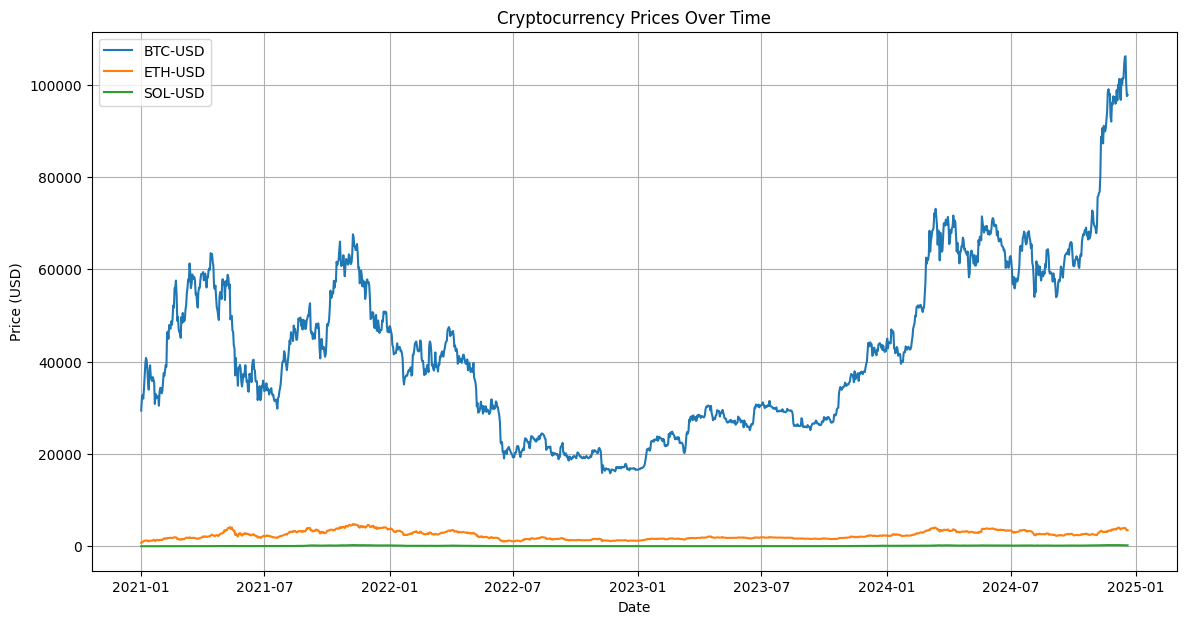

In [19]:
# Getting the close columns
close_columns = [i for i in df.columns if 'Close' in i]

# Formatting the date
df.Date = pd.to_datetime(df.Date)

# Plotting the three time series values
plt.figure(figsize=(14,7))
for ticker, close_col in zip(tickers,close_columns):
    plt.plot(df['Date'], df[close_col],label=ticker)

plt.title('Cryptocurrency Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

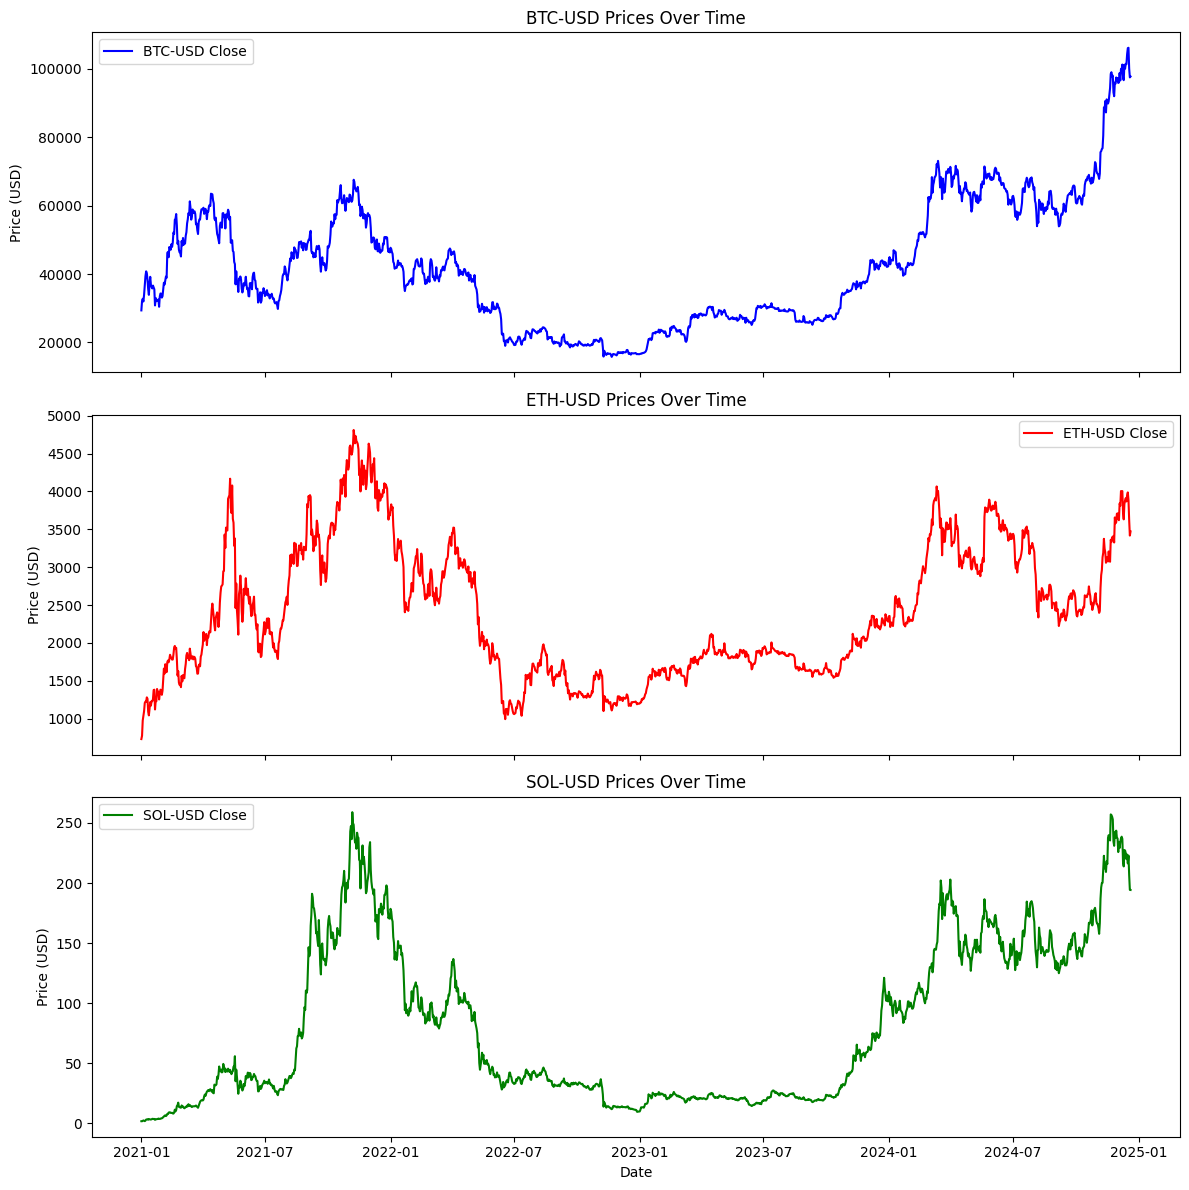

In [21]:
colors = ['blue','red','green']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12), sharex=True)
for ax, ticker, close_col, col in zip(axes, tickers, close_columns, colors):
    ax.plot(df['Date'], df[close_col], label=f'{ticker} Close', color=col)
    ax.set_title(f'{ticker} Prices Over Time')
    ax.set_ylabel('Price (USD)')
    ax.legend()
    

plt.xlabel('Date')
plt.tight_layout()
plt.show()